# Assessed Problem #3

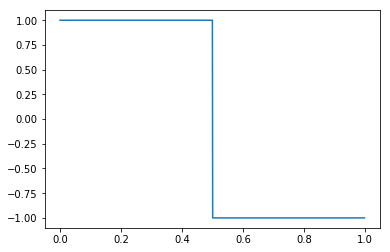

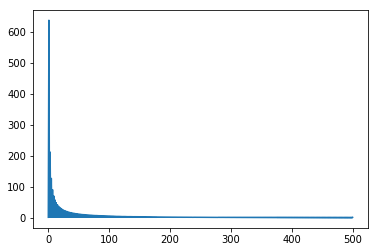

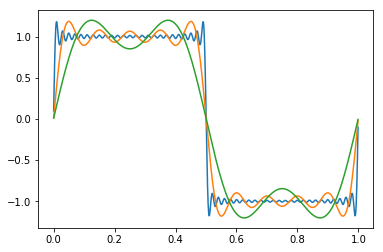

In [31]:
#Libraries
from numpy import arange, sin,pi, floor
from numpy.fft import rfft, irfft
from matplotlib.pyplot import plot, show
#

#Subroutines
def SqWave(t):
    for i in range(len(t)):
        if sin(t[i]*2*pi)%2 < 1: t[i] =  1
        else: 
            if sin(t[i]*2*pi)%2 > 1: t[i] = -1
            else: t[i] = t[i-1]
    return t
def SetToZero(A,n): # A is the array # n is the number of values to save
    _A = A
    for i in range(len(A)-n):
        _A[i+n]=0
    return _A
#

#Computation
N = 1000.
n = 1.
plot(arange(0,n,n/N),SqWave(arange(0,n,n/N)))
show()
c=rfft(SqWave(arange(0,n,n/N)))
plot(abs(c))
show()

plot(arange(0,n,n/N),irfft(SetToZero(c, 50)), 'k-', label = "50 Terms")
plot(arange(0,n,n/N),irfft(SetToZero(c, 10)), 'r-', label = "10 Terms")
plot(arange(0,n,n/N),irfft(SetToZero(c, 5 )), 'b-', label = "5  Terms")
show()
#